## Preparing the environment

* Upload the file requirements_exploring.txt
* Upload the file heard.csv to the directory datasets

In [14]:
pip install -r requirements_exploring.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Exploring data

There are 10 variables in the dataset [heart.csv](heart.csv):
- sbp: Systolic blood pressure
- tobacco: Cumulative tobacco consumption, in kg
- ldl: Low-density lipoprotein cholesterol
- adiposity: Adipose tissue concentration
- famhist: Family history of heart disease (1=Present, 0=Absent)
- typea: Score on test designed to measure type-A behavior
- obesity: Obesity
- alcohol: Current consumption of alcohol
- age: Age of subject
- chd: Coronary heart disease at baseline; 1=Yes 0=No

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('heart.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### Converting categorical variables into numbers

In [17]:
history_mapping = {'Absent': 0,'Present': 1}
df["famhist"] = df["famhist"].map(history_mapping)

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [18]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age', 'chd']

In [19]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        ,  0.21224652,  0.15829633,  0.35650008,  0.08564531,
        -0.05745431,  0.23806661,  0.14009559,  0.3887706 ,  0.19235411],
       [ 0.21224652,  1.        ,  0.15890546,  0.28664037,  0.08860143,
        -0.01460788,  0.12452941,  0.20081339,  0.45033016,  0.29971754],
       [ 0.15829633,  0.15890546,  1.        ,  0.44043175,  0.16135306,
         0.04404758,  0.33050586, -0.0334034 ,  0.31179923,  0.26305268],
       [ 0.35650008,  0.28664037,  0.44043175,  1.        ,  0.18172101,
        -0.04314364,  0.71655625,  0.10033013,  0.62595442,  0.25412139],
       [ 0.08564531,  0.08860143,  0.16135306,  0.18172101,  1.        ,
         0.04480858,  0.11559508,  0.08051969,  0.23966742,  0.27237273],
       [-0.05745431, -0.01460788,  0.04404758, -0.04314364,  0.04480858,
         1.        ,  0.0740061 ,  0.03949794, -0.10260632,  0.10315583],
       [ 0.23806661,  0.12452941,  0.33050586,  0.71655625,  0.11559508,
         0.0740061 ,  1.        ,  0.05161957

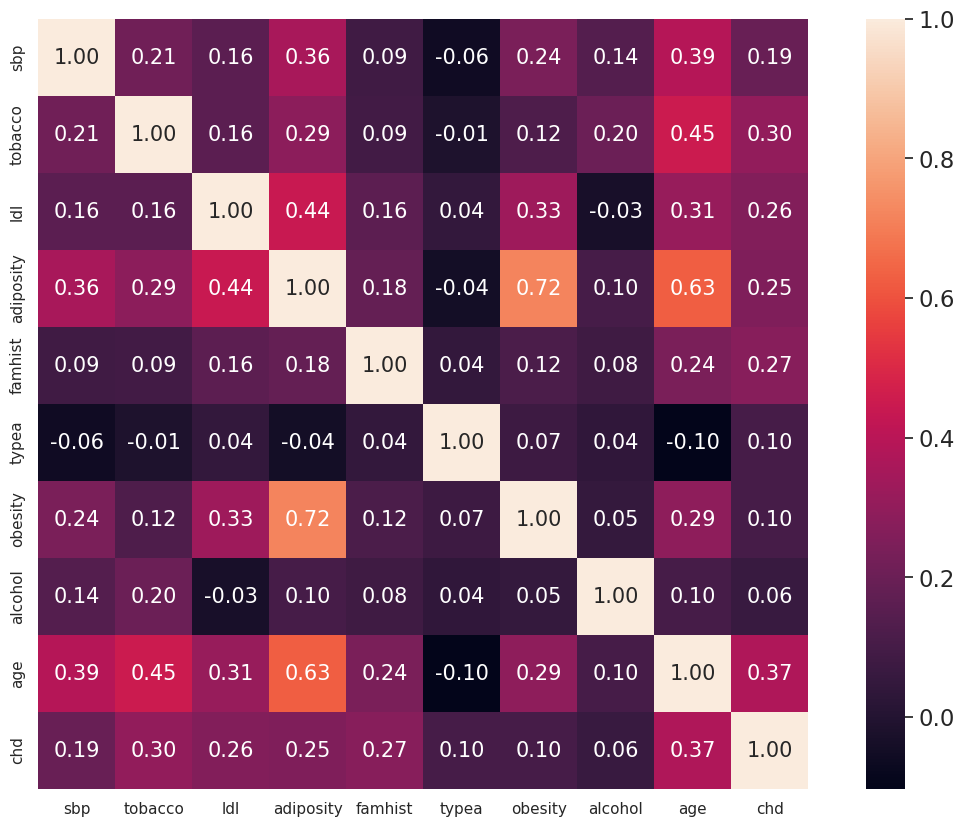

In [20]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

## Machine Learning

In [21]:
X=df[['tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age']].values
y=df[['chd']].values 

In [22]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( C=100, penalty='l2',solver='liblinear')

model.fit(X_train, y_train)

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, solver='liblinear')

In [24]:
model.score(X_train, y_train)

0.7337461300309598

In [25]:
data = {'tobacco': [0.0],
        'ldl': [6],
        'adiposity': [22.5],
        'famhist' : [1],
        'typea' : [55],
        'obesity' :  [29.14],
        'alcohol' : [3.81],
        'age' : [38] }

In [26]:
df = pd.DataFrame(data)
# IMPORTANT!!!: Defining column order for the model input prediction
desired_order= ['tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age']

In [28]:
print(f'Predicting data for input: {df.to_json()}')
print(f'Prediction for chd (Coronary heart disease at baseline; 1=Yes 0=No): {model.predict(df.values)}')


Predicting data for input: {"tobacco":{"0":0.0},"ldl":{"0":6},"adiposity":{"0":22.5},"famhist":{"0":1},"typea":{"0":55},"obesity":{"0":29.14},"alcohol":{"0":3.81},"age":{"0":38}}
Prediction for chd (Coronary heart disease at baseline; 1=Yes 0=No): [0]
